In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pprint
from scipy.stats import linregress

In [2]:
happy_years_csv = "Output/multiple_year_data.csv"

In [3]:
happy_years_df = pd.read_csv(happy_years_csv)

happy_years_df

,Country,2022 Rank,2022 Happiness Score,2021 Rank,2021 Happiness Score,2020 Rank,2020 Happiness Score,2019 Rank,2019 Happiness Score,2018 Rank,2018 Happiness Score,2017 Rank,2017 Happiness Score,2016 Rank,2016 Happiness Score,2015 Rank,2015 Happiness Score
0,Finland,1,7.82,1,7.84,1,7.81,1,7.77,1,7.63,5,7.47,5,7.41,6,7.41
1,Denmark,2,7.64,2,7.62,2,7.65,2,7.60,3,7.56,2,7.52,1,7.53,3,7.53
2,Iceland,3,7.56,4,7.55,4,7.50,4,7.49,4,7.50,3,7.50,3,7.50,2,7.56
3,Switzerland,4,7.51,3,7.57,3,7.56,6,7.48,5,7.49,4,7.49,2,7.51,1,7.59
4,Netherlands,5,7.42,5,7.46,6,7.45,5,7.49,6,7.44,6,7.38,7,7.34,7,7.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Tanzania,139,3.70,142,3.62,148,3.48,153,3.23,153,3.30,153,3.35,149,3.67,146,3.78
113,Sierra Leone,140,3.57,138,3.85,139,3.93,129,4.37,113,4.57,106,4.71,111,4.64,123,4.51
114,Zimbabwe,144,3.00,148,3.14,151,3.30,146,3.66,144,3.69,138,3.88,131,4.19,115,4.61
115,Lebanon,145,2.96,123,4.58,111,4.77,91,5.20,80,5.36,88,5.22,93,5.13,103,4.84


In [4]:
# Did covid impact happiness?
avg_happy_2015 = happy_years_df['2015 Happiness Score'].mean()
avg_happy_2016 = happy_years_df['2016 Happiness Score'].mean()
avg_happy_2017 = happy_years_df['2017 Happiness Score'].mean()
avg_happy_2018 = happy_years_df['2018 Happiness Score'].mean()
avg_happy_2019 = happy_years_df['2019 Happiness Score'].mean()
avg_happy_2020 = happy_years_df['2020 Happiness Score'].mean()
avg_happy_2021 = happy_years_df['2021 Happiness Score'].mean()
avg_happy_2022 = happy_years_df['2022 Happiness Score'].mean()

In [5]:
avg_happiness_df = pd.DataFrame({'Year': [2015,2016,2017,2018,2019,2020,2021,2022], 
                                 'Avg. Happiness': [avg_happy_2015,avg_happy_2016,avg_happy_2017,avg_happy_2018,
                                                    avg_happy_2019,avg_happy_2020,avg_happy_2021,avg_happy_2022]})
avg_happiness_df

,Year,Avg. Happiness
0,2015,5.526667
1,2016,5.534444
2,2017,5.550256
3,2018,5.586838
4,2019,5.623248
5,2020,5.672650
6,2021,5.697350
7,2022,5.675385


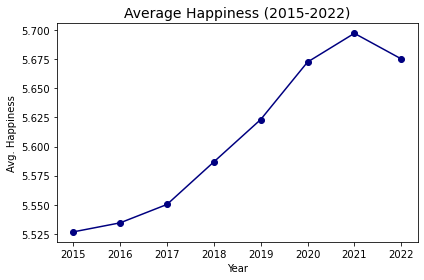

In [6]:
x_axis = avg_happiness_df['Year']
y_axis = avg_happiness_df['Avg. Happiness']

plt.plot(x_axis, y_axis, marker = 'o', color = 'navy', linewidth = 1.5)

plt.rcParams["font.family"] = "Times New Roman"
plt.xlabel('Year')
plt.ylabel('Avg. Happiness')
plt.title('Average Happiness (2015-2022)', fontsize = 14)

plt.tight_layout()
plt.savefig('Images/Average Happiness (2015-2022).png')
plt.show()

In [7]:
# Top 5 countries 2022- trend of happiness over time
happiest_countries_2022 = happy_years_df.sort_values('2022 Happiness Score', ascending = False)
happiest_countries_top5_2022 = happiest_countries_2022.head()
happiest_countries_top5_2022

,Country,2022 Rank,2022 Happiness Score,2021 Rank,2021 Happiness Score,2020 Rank,2020 Happiness Score,2019 Rank,2019 Happiness Score,2018 Rank,2018 Happiness Score,2017 Rank,2017 Happiness Score,2016 Rank,2016 Happiness Score,2015 Rank,2015 Happiness Score
0,Finland,1,7.82,1,7.84,1,7.81,1,7.77,1,7.63,5,7.47,5,7.41,6,7.41
1,Denmark,2,7.64,2,7.62,2,7.65,2,7.60,3,7.56,2,7.52,1,7.53,3,7.53
2,Iceland,3,7.56,4,7.55,4,7.50,4,7.49,4,7.50,3,7.50,3,7.50,2,7.56
3,Switzerland,4,7.51,3,7.57,3,7.56,6,7.48,5,7.49,4,7.49,2,7.51,1,7.59
4,Netherlands,5,7.42,5,7.46,6,7.45,5,7.49,6,7.44,6,7.38,7,7.34,7,7.38


In [8]:
x_axis = happiest_countries_top5_2022['Country']
# y1 = happiest_countries_top5_2022.loc[happiest_countries_top5_2022['Country'][0],:]
y1=happiest_countries_top5_2022.iloc[0]
# y1 = happiest_countries_top5_2022['2016 Happiness Score']
# y1 = happiest_countries_top5_2022['2017 Happiness Score']
# y1 = happiest_countries_top5_2022['2018 Happiness Score']
# y1 = happiest_countries_top5_2022['2019 Happiness Score']
# y1 = happiest_countries_top5_2022['2020 Happiness Score']
# y1 = happiest_countries_top5_2022['2021 Happiness Score']
# y1 = happiest_countries_top5_2022['2022 Happiness Score']
y1

Country                 Finland
2022 Rank                     1
2022 Happiness Score       7.82
2021 Rank                     1
2021 Happiness Score       7.84
2020 Rank                     1
2020 Happiness Score       7.81
2019 Rank                     1
2019 Happiness Score       7.77
2018 Rank                     1
2018 Happiness Score       7.63
2017 Rank                     5
2017 Happiness Score       7.47
2016 Rank                     5
2016 Happiness Score       7.41
2015 Rank                     6
2015 Happiness Score       7.41
Name: 0, dtype: object

In [9]:
# Input for users to input countries to compare- find a way to input country name into the x axis and the chart change
# def buildTrace(country):
   
#    return trace

# display default graph with trace1
# compare = input('would you like to compare an individual country to this graph (y/n)? ')
# while compare = 'y':
#    country = input('what country do you want to compare? ')
#    trace2 = buildTrace(country)
#    display graph with both trace1 and trace2

#    compare = input('would you like to compare another country (y/n)? ')
# # Print a line plot for the desired countries

In [28]:
input_country1=input(f'What country would you like to see the score for over the years?')
input_country2=input(f'Name a second country you would like to see the score for over the years for?')
chosen_df1=happy_years_df.loc[happy_years_df["Country"]==input_country1, ["2022 Happiness Score","2021 Happiness Score","2020 Happiness Score","2019 Happiness Score","2018 Happiness Score","2017 Happiness Score","2016 Happiness Score","2015 Happiness Score"]]
chosen_df2=happy_years_df.loc[happy_years_df["Country"]==input_country2, ["2022 Happiness Score","2021 Happiness Score","2020 Happiness Score","2019 Happiness Score","2018 Happiness Score","2017 Happiness Score","2016 Happiness Score","2015 Happiness Score"]]
# chosen_df.values.flatten().tolist()


What country would you like to see the score for over the years?Japan
Name a second country you would like to see the score for over the years for?Germany


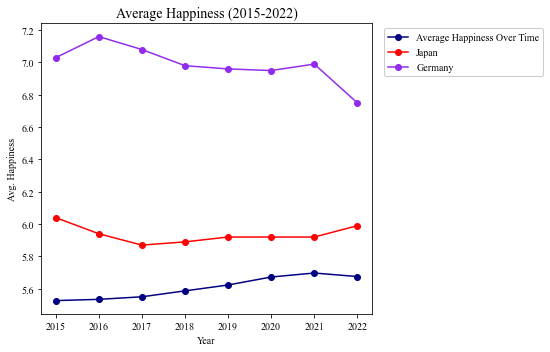

In [46]:
x_axis = avg_happiness_df['Year']
y_axis = avg_happiness_df['Avg. Happiness']
plt.figure(figsize=(9,5))
plt.plot(x_axis, y_axis, marker = 'o', color = 'navy', linewidth = 1.5, label="Average Happiness Over Time")
plt.plot(x_axis,chosen_df1.values.flatten().tolist(), marker='o',color='red',linewidth=1.5, label=input_country1)
plt.plot(x_axis,chosen_df2.values.flatten().tolist(), marker='o',color='#912CEE',linewidth=1.5, label=input_country2)

legend = plt.legend(loc = 'center right', fontsize = 10, bbox_to_anchor=(1.53, .9))
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 0, 1, 0))

plt.rcParams["font.family"] = "Times New Roman"
plt.xlabel('Year')
plt.ylabel('Avg. Happiness')
plt.title('Average Happiness (2015-2022)', fontsize = 14)

plt.tight_layout()
plt.savefig('Average Happiness (2015-2022) 2 countries.png')
plt.show()


In [ ]:
pd.set_option("display.max_rows",None)
happy_years_df